# Understanding Optical Pulses class

This notebook explores the representation and manipulation of the Pulse class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ParaTune.light.GaussianPulse import GaussianPulse

## `GaussianPulse` 

The `Pulse` class serves as an abstract base class for defining optical pulses. It includes common properties such as central wavelength, bandwidth, and mean power, along with an abstract property `wavelength_amplitude` that must be implemented by subclasses.

The `GaussianPulse` class is a concrete implementation of the `Pulse` class, modeling a pulse with a Gaussian amplitude distribution. It overrides the `wavelength_amplitude` property to return the Gaussian-shaped amplitude.

### 1. Define a refractive index function
For simplicity, we consider a constant refractive index in the examples

In [2]:
# Assuming the refractive index function is defined for the examples
def refractive_index(wavelength: float) -> float:
    return 1.5  # A placeholder constant refractive index

### 2. Setting Up the Gaussian Pulse
Let's create a GaussianPulse instance. We'll use this pulse as the basis for our modifications.

In [3]:
# Instantiate a GaussianPulse
gaussian_pulse = GaussianPulse(
    wavelength_central=1550e-9,  # Central wavelength in meters
    wavelength_bandwidth=20e-9,  # Bandwidth in meters
    mean_power=1e-3,  # Mean power in Watts
    repetition_rate=80e6,  # Repetition rate in Hz
    number_of_grid_points=1000,
    wavelength_span=100e-9,  # Wavelength span in meters
    refractive_index_function=refractive_index
)

### 3. Auto-update Parameters

One of the key features of the Pulse class is its ability to automatically update related parameters when a fundamental attribute is changed. This ensures that the pulse's representation remains consistent across the wavelength, frequency, and time domains.

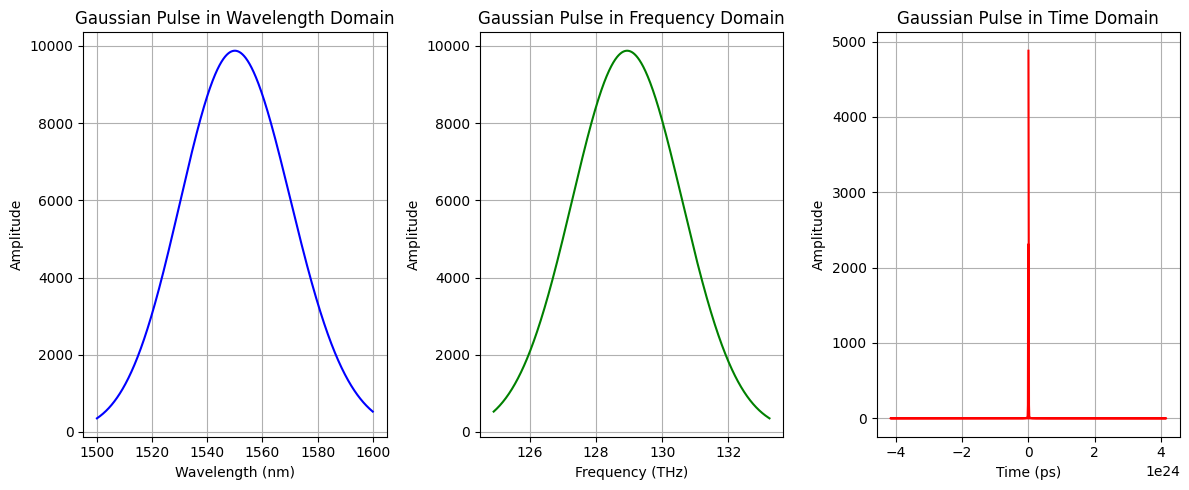

In [4]:
# Prepare the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Wavelength domain representation
axs[0].plot(gaussian_pulse.wavelength_grid * 1e9, np.abs(gaussian_pulse.wavelength_amplitude), label='Amplitude', color='b')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Gaussian Pulse in Wavelength Domain')
axs[0].grid(True)

# Frequency domain representation
axs[1].plot(gaussian_pulse.frequency_grid * 1e-12, np.abs(gaussian_pulse.frequency_amplitude), label='Amplitude', color='g')
axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Gaussian Pulse in Frequency Domain')
axs[1].grid(True)

# Time domain representation
axs[2].plot(gaussian_pulse.time_grid * 1e12, np.abs(gaussian_pulse.time_amplitude), label='Amplitude', color='r')
axs[2].set_xlabel('Time (ps)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Gaussian Pulse in Time Domain')
axs[2].grid(True)

plt.tight_layout()
plt.show()


### 4. Additional effects

The Pulse class that allow for the simulation of realistic effects on optical pulses, including spectral distortion, the addition of quantum noise, and the introduction of chirp. These features are crucial for accurately modeling the behavior of pulses in optical systems subject to various physical phenomena.

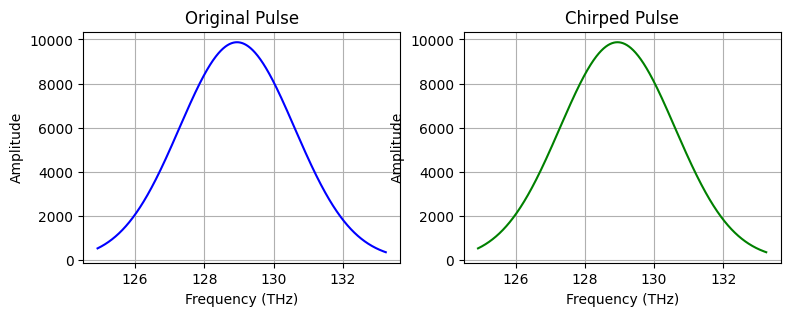

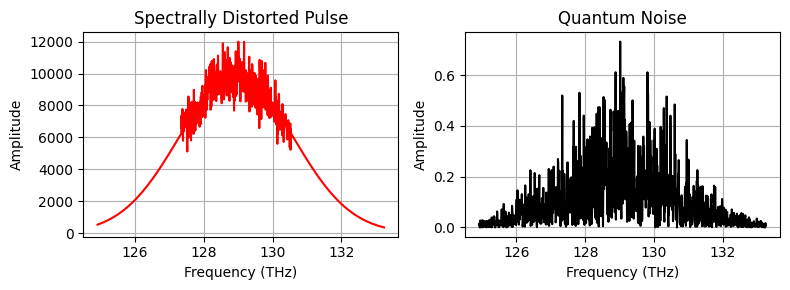

In [5]:
gdd = 50000e30 # group delay dispersion [fs^2]
chirped_pulse = gaussian_pulse.apply_gdd_to_pulse(gdd)
bandwidth_omega = 20e12 # bandwidth over which the effect is applied [rad Hz]
distorted_pulse_spectrum = gaussian_pulse.distort_pulse_spectrum(bandwidth_omega, gaussian_pulse.random_distortion)
quantum_noised_pulse_spectrum = gaussian_pulse.add_quantum_noise()

# Prepare the figure and subplots
fig1, axs1 = plt.subplots(1, 2, figsize=(9, 3))

# Wavelength domain representation
axs1[0].plot(gaussian_pulse.frequency_grid * 1e-12, np.abs(gaussian_pulse.frequency_amplitude), color='b')
axs1[0].set_xlabel('Frequency (THz)')
axs1[0].set_ylabel('Amplitude')
axs1[0].set_title('Original Pulse')
axs1[0].grid(True)

# Wavelength domain representation
axs1[1].plot(gaussian_pulse.frequency_grid * 1e-12, np.abs(chirped_pulse), color='g')
axs1[1].set_xlabel('Frequency (THz)')
axs1[1].set_ylabel('Amplitude')
axs1[1].set_title('Chirped Pulse')
axs1[1].grid(True)

# Prepare the figure and subplots
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 3))

# Frequency domain representation
axs2[0].plot(gaussian_pulse.frequency_grid * 1e-12, np.abs(distorted_pulse_spectrum), color='r')
axs2[0].set_xlabel('Frequency (THz)')
axs2[0].set_ylabel('Amplitude')
axs2[0].set_title('Spectrally Distorted Pulse')
axs2[0].grid(True)

# Time domain representation
axs2[1].plot(gaussian_pulse.frequency_grid * 1e-12, np.abs(quantum_noised_pulse_spectrum), color='k')
axs2[1].set_xlabel('Frequency (THz)')
axs2[1].set_ylabel('Amplitude')
axs2[1].set_title('Quantum Noise')
axs2[1].grid(True)

plt.tight_layout()
plt.show()


## `DataPulse` 

The DataPulse class allows to create an optical pulse based on experimental data. The DataPulse class is designed to read amplitude data from a CSV file and interpolate it over a specified wavelength grid, allowing you to work with real-world pulse data in your simulations and analyses.

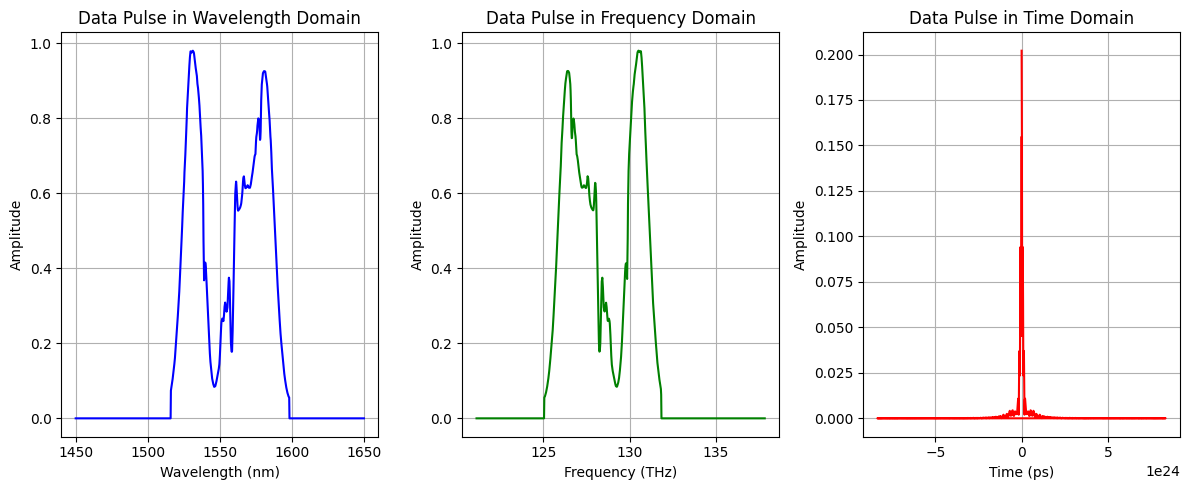

In [6]:
from ParaTune.light.DataPulse import DataPulse

# Instantiate the DataPulse class
data_pulse = DataPulse(
    wavelength_central=1550e-9,  # Central wavelength in meters
    wavelength_bandwidth=100e-9,  # Spectral bandwidth in meters
    mean_power=1e-3,  # Mean power in Watts
    repetition_rate=80e6,  # Repetition rate in Hz
    number_of_grid_points=1000,  # Number of points for the grid
    wavelength_span=200e-9,  # Span of wavelengths considered in meters
    refractive_index_function=refractive_index,
    file_name='example_spectrum'  # Name of the CSV file without the extension
)

# Prepare the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Wavelength domain representation
axs[0].plot(data_pulse.wavelength_grid * 1e9, np.abs(data_pulse.wavelength_amplitude), label='Amplitude', color='b')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Data Pulse in Wavelength Domain')
axs[0].grid(True)

# Frequency domain representation
axs[1].plot(data_pulse.frequency_grid * 1e-12, np.abs(data_pulse.frequency_amplitude), label='Amplitude', color='g')
axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Data Pulse in Frequency Domain')
axs[1].grid(True)

# Time domain representation
axs[2].plot(data_pulse.time_grid * 1e12, np.abs(data_pulse.time_amplitude), label='Amplitude', color='r')
axs[2].set_xlabel('Time (ps)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Data Pulse in Time Domain')
axs[2].grid(True)

plt.tight_layout()
plt.show()
